In [1]:
import random 
import numpy as np
from numpy.random import uniform 
import warnings 
import math

import pandas as pd
import plotly.express as px

from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn import metrics

import matplotlib.pyplot as plt

%matplotlib inline

Adjusting options for the inline figures

In [2]:
# Adjusting the resolution and format of the inline images

# Possible options: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’
%config InlineBackend.figure_formats = ["retina"]
# %config InlineBackend.figure_formats = ["svg"]

In [3]:
# Setting the dpi of the inline figures
# plt.rcParams["figure.dpi"] = 200

In [4]:
# Available styles (these will change the colormap as well)

# Colorblind options; uncomment to select an option:
# plt.style.use("seaborn-colorblind")
# plt.style.use("tableau-colorblind10")

# To print all the possible options:
# plt.style.available

In [ ]:
# Adjusting the colormap (also modified by the commands above)
# plt.rcParams["image.cmap"] = "cividis"

In [5]:
def scatter_blobs(X,y,title):
    plt.scatter(X[:, 0], X[:, 1], c=y) 
    plt.title(title) 
    plt.show()

# K-means in scikit-learn 

We use the Gaussian blobs dataset to showcase K-means in scikit-learn.

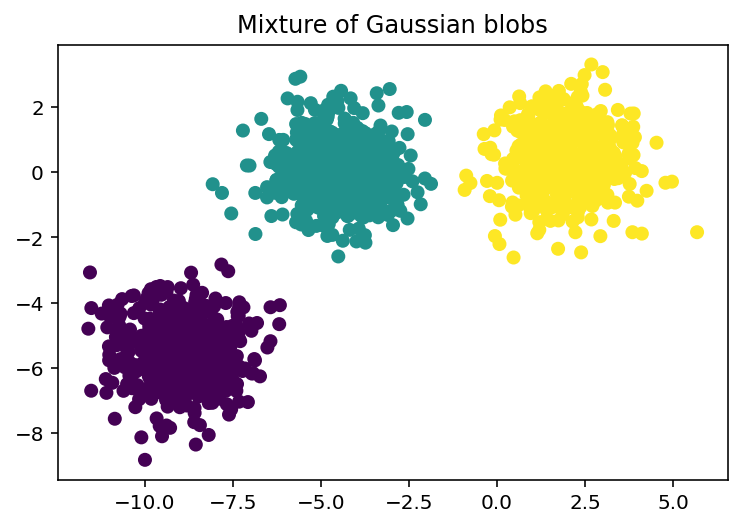

In [6]:
n_samples = 1500
random_state = 170

X, y = make_blobs(n_samples=n_samples, random_state=random_state)

scatter_blobs(X,y,"Mixture of Gaussian blobs")

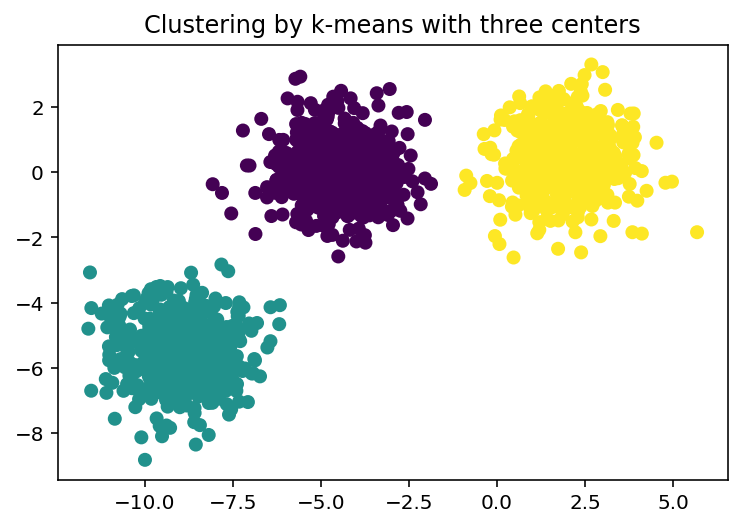

In [7]:
sklearn_kmean = KMeans(n_init=10, n_clusters=3)
sklearn_kmean.fit(X) 
scatter_blobs(X,sklearn_kmean.labels_,"Clustering by k-means with three centers")

# Q1 Implementing k-means from scratch

In this question, you are asked to implement the k-means Clustering Algorithm. The k-means algorithm requires you to specify the number k of clusters/groups a priori, as shown in above sklearn k-means implementation. 

The center of each cluster is a centroid. These centers are randomly initialized. After the initialization, we perform the following iterations to optimize the locations of the k centroids: 


```
repeat until convergence: 
     1. Calculate the distance from each point to each centroid.
     2. Assign each point to its nearest centroid. 
     3. Centroids are shifted to be the average value of the points belonging to the cluster. 
     (convergence criteria: the location of the centroids stops changing.) 
```

To measure how well a given dataset is clustered by k-means, we use a quantity called `inertia`, which is calculated by summing the squares of the distance between each data point and its corresponding centroid. A good model is one with a small number of clusters and small inertia.

Although we can use different measures of distance, for this homework, we only use the Euclidean distance as our metric. You are given a helper function `euclidean_dist2(point, data)`, which returns the Euclidean distance squared between a point to a dataset. 

You are provided the first part of the class `my_KMeans`, which you will need to complete. You are already given the `__init__` method, and the first part of `fit_transform(self, X_train)`. You should implement the rest of the member function to return the following quantities in this order: the location of the centroids with size `(n_clusters, m)`, the centroid indices with size `(n, )` (i.e., the index of the centroid the `X_train` belongs to), and inertia. We assume that `X_train` has size `(n, m)`.

In [8]:
def euclidean_dist2(point, data):
    """
    Squared Euclidean distance between data and point.
    Dimensions:
    data: (n,m)
    point: (m,)
    output: (n,)
    """
    return np.sum((point - data)**2, axis=1)

In [9]:
class my_KMeans:

    def __init__(self, n_clusters=5, max_iter=300, init=None):
        self.n_clusters = n_clusters 
        self.max_iter = max_iter 
        self.init = init

    def fit_transform(self, X_train):
        if self.init is not None:
            centroids = self.init 
        else: 
        # Randomly initialize the centers using the 'sklearns++' technique, which 
        # selects the initial cluster centroids using sampling based on an empirical probability 
        # distribution of the points’ contribution to the overall inertia. This technique
        # speeds up convergence.
            centroids = [random.choice(X_train)]
            for _ in range(self.n_clusters-1):
                # Calculate distances from points to the centroids
                dists = np.sum([np.sqrt(euclidean_dist2(centroid, X_train)) for centroid in centroids], axis=0)
                # Normalize the distances
                dists /= np.sum(dists)
                # Choose point based on their distances
                new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists)
                centroids += [X_train[new_centroid_idx]]
        

         
        # start your implementation here! 
        iteration = 0

        while iteration < self.max_iter:

          temp = centroids

          #sort training data based on the nearest centroid
          # create empty lists to store sorted data points
          sorted_points = [[] for _ in range(self.n_clusters)]

          centroid_indices = []

          for x in X_train:
            #calculate the distance to each centroid
            try:
              dists = euclidean_dist2(x, np.array(centroids))
            except:       
              print("duplicated initial centroids causes empty clustering")
              return

            #get the index of the nearest centroid
            centroid_idx = np.argmin(dists)
            centroid_indices.append(centroid_idx)
            sorted_points[centroid_idx].append(x)

          #update centroids values
          centroids = [np.mean(cluster, axis =0) for cluster in sorted_points]

          for i in range(len(centroids)):
            if centroids[i].any() == math.nan:
              print("nan occurs")
              centroids = temp

          iteration +=1
        
        #calculate inertia
        inertia = 0
        for centroid_idx in range(self.n_clusters):
          #print(np.array(sorted_points[centroid_idx]).shape)
          inertia += np.sum(euclidean_dist2(centroids[centroid_idx], sorted_points[centroid_idx]))
        
        print('my_kmean_inertia:{:.3f}'.format(inertia))
          
        return centroids, centroid_indices, inertia 



To evaluate your implementation, compare the output of your k-means implementation with the k-means implementation from the Sklearn library. First, we should notice that the k-means algorithm is not deterministic due to the random initialization of the centroids. However, k-means becomes deterministic after we fix the initialization. 

In [130]:
n_samples = 300

# number of failures 
num_of_mismatches = 0 

for i in range(100): 

    # Generating random Gaussian blobs dataset 
    n_centers = random.randint(2,5) 
    X, y = make_blobs(n_samples=n_samples, centers=n_centers) 

    # Randomly initialize the centers using the 'sklearns++' technique, which 
    # selects initial cluster centroids using sampling based on an empirical probability 
    # distribution of the points’ contribution to the overall inertia. This technique
    # speeds up convergence. 
    init_centroids = [random.choice(X)]
    for _ in range(n_centers-1):
        # Calculate distances from points to the centroids
        dists = np.sum([np.sqrt(euclidean_dist2(centroid, X)) for centroid in init_centroids], axis=0)
        # Normalize the distances
        dists /= np.sum(dists)
        # Choose remaining points based on their distances
        new_centroid_idx, = np.random.choice(range(len(X)), size=1, p=dists)
        init_centroids += [X[new_centroid_idx]]

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        sklearn_kmean = KMeans(n_clusters=n_centers, init=np.asarray(init_centroids), tol=1e-10) 
        sklearn_kmean.fit(X)
    my_kmean = my_KMeans(n_clusters=n_centers, init=init_centroids) 

    centroids, _, my_kmean_inertia = my_kmean.fit_transform(X) 

    if i % 10 == 0: 
        print(i) 

    if abs(sklearn_kmean.inertia_ - my_kmean_inertia) > 1: 
        num_of_mismatches += 1 
        print('sklearn_kmean.inertia:{:.3f}, my_kmean_inertia:{:.3f}'.format(
            sklearn_kmean.inertia_, my_kmean_inertia))
        assert num_of_mismatches < 5, 'too many mismatches!'
        
# You may see a few
# "[kmeans] empty cluster at iteration ..."
# and
# sklearn_kmean.inertia:XXX, my_kmean_inertia:XXX
# because of poor convergence due to a bad initialization.
# If your code works correctly, the number of mismatches should be less than 5.

my_kmean_inertia:586.351
0
my_kmean_inertia:585.692
my_kmean_inertia:569.819
my_kmean_inertia:578.389
my_kmean_inertia:557.036
my_kmean_inertia:3557.834
my_kmean_inertia:614.130
my_kmean_inertia:1279.453
my_kmean_inertia:439.588
my_kmean_inertia:649.092
my_kmean_inertia:640.833
10
my_kmean_inertia:529.929
my_kmean_inertia:615.675
my_kmean_inertia:3022.871
my_kmean_inertia:621.453
my_kmean_inertia:547.968
my_kmean_inertia:513.986
my_kmean_inertia:568.427
my_kmean_inertia:558.949
my_kmean_inertia:805.302
my_kmean_inertia:1780.715
20
my_kmean_inertia:589.422
my_kmean_inertia:604.096
my_kmean_inertia:2160.465
my_kmean_inertia:993.269
my_kmean_inertia:662.871
my_kmean_inertia:1167.407
my_kmean_inertia:2610.794
my_kmean_inertia:586.503
my_kmean_inertia:627.654
my_kmean_inertia:596.587
30
my_kmean_inertia:617.971
my_kmean_inertia:1836.136
my_kmean_inertia:2129.269
my_kmean_inertia:598.224
my_kmean_inertia:633.840
my_kmean_inertia:1186.624
my_kmean_inertia:579.783
my_kmean_inertia:968.446
my_k

# Q2 Select the optimal $k$ by looking at the graph of inertia vs $k$

For this question, you should implement the function` plot_inertia(X)`. This function will take in an input `X` and run your implementation `my_KMeans` multiple times with different hyperparameters `k` (i.e., the number of clusters). You should record the inertia value for different `k`, and make a plot of `k` vs `inertia`. Observe your graph and comment on how you should select the optimal value of `k` for k-means based on the graph. Is the optimal value you found close to the ground truth value? 

In [12]:
def plot_inertia(X): 
    # start your implementation here!  

    k = []
    inertia = []
    for i in range(1,10):
      my_kmean = my_KMeans(n_clusters=i, init=None) 
      centroids, _, my_kmean_inertia = my_kmean.fit_transform(X)
      k.append(i)
      inertia.append(my_kmean_inertia)

    plt.plot(k, inertia)
    plt.xlabel("k")
    plt.ylabel("Inertia")
    plt.show()    


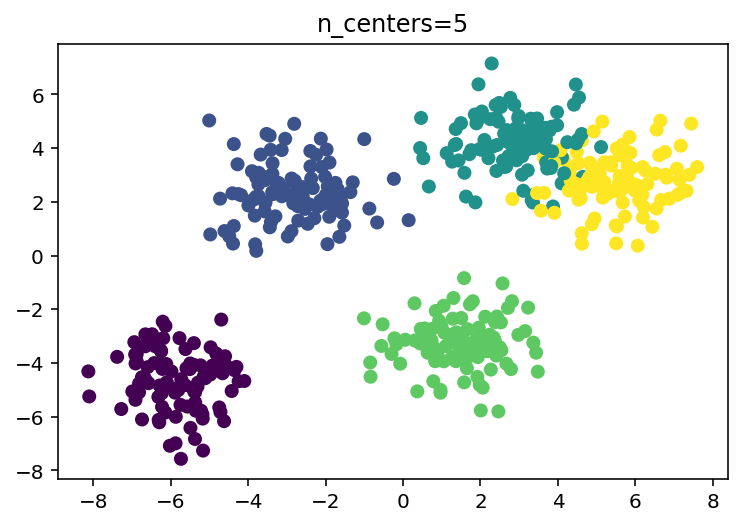

In [13]:
X, y = make_blobs(n_samples=500, n_features=2, random_state=250, centers=5)
scatter_blobs(X,y,"n_centers=5")

my_kmean_inertia:15449.420
my_kmean_inertia:6834.160
my_kmean_inertia:3946.864
my_kmean_inertia:1432.426
my_kmean_inertia:1371.392
my_kmean_inertia:891.485
my_kmean_inertia:825.029
my_kmean_inertia:828.967
my_kmean_inertia:681.091


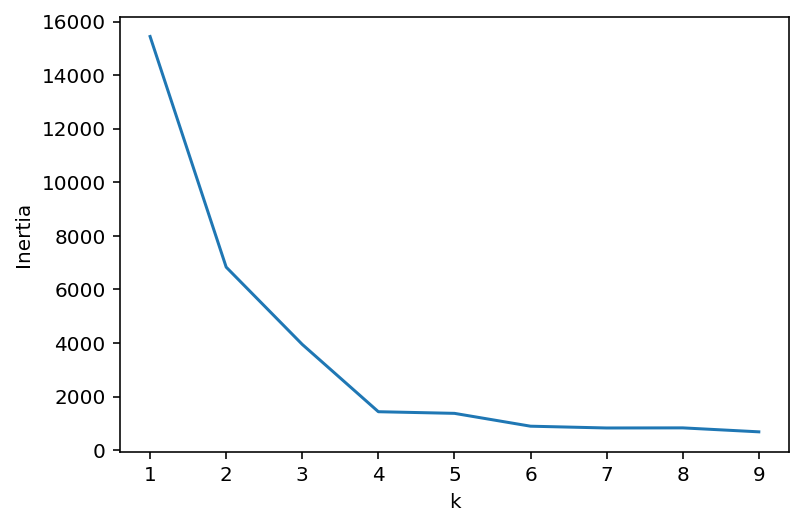

In [15]:
plot_inertia(X)

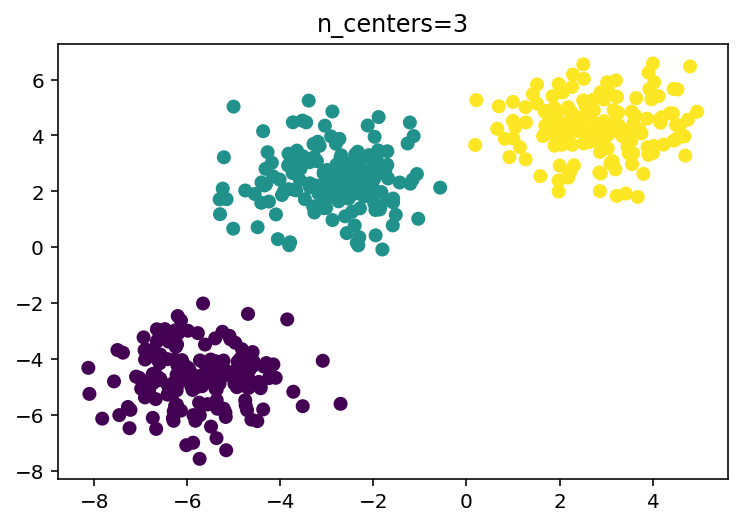

In [16]:
X, y = make_blobs(n_samples=500, n_features=2, random_state=250, centers=3) 
scatter_blobs(X,y,"n_centers=3")

my_kmean_inertia:14721.757
my_kmean_inertia:3959.933
my_kmean_inertia:994.144
my_kmean_inertia:884.325
my_kmean_inertia:815.657
my_kmean_inertia:698.530
my_kmean_inertia:584.314
my_kmean_inertia:573.967
my_kmean_inertia:441.039


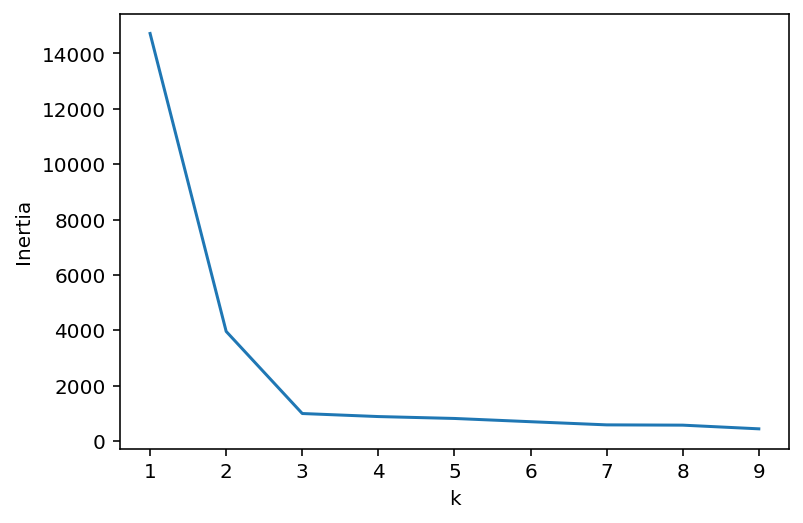

In [17]:
plot_inertia(X)

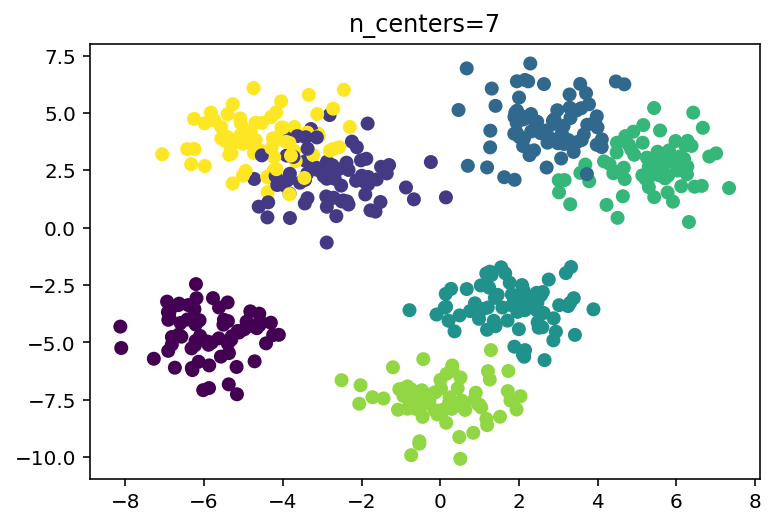

In [18]:
X, y = make_blobs(n_samples=500, n_features=2, random_state=250, centers=7) 
scatter_blobs(X,y,"n_centers=7")

my_kmean_inertia:17803.713
my_kmean_inertia:8656.365
my_kmean_inertia:4457.709
my_kmean_inertia:2239.787
my_kmean_inertia:1869.477
my_kmean_inertia:1293.519
my_kmean_inertia:1443.765
my_kmean_inertia:1203.024
my_kmean_inertia:1375.031


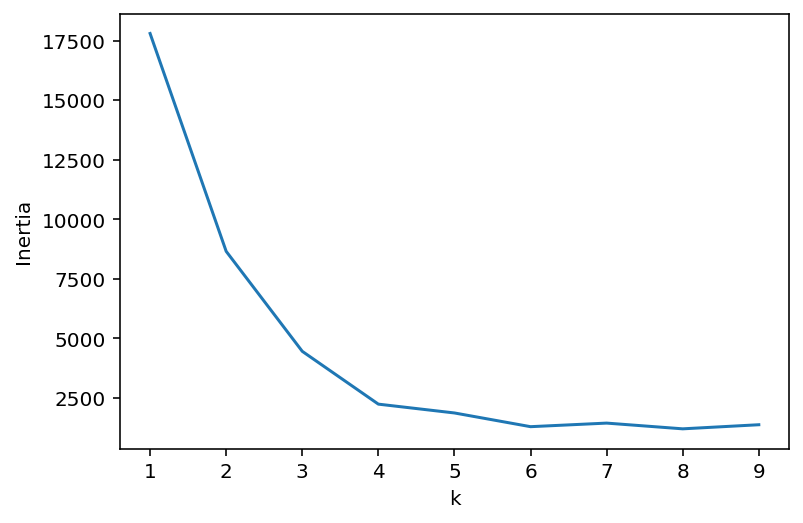

In [19]:
plot_inertia(X)

# DBSCAN clustering algorithm 

Let's generate four Gaussian blobs with a line of points connecting two of them. This will be used to illustrate the usage of DBSCAN in sklearn. 

In [95]:
def make_blobs_with_line():
    X, labels = make_blobs(n_samples=500, centers = [[1, 2], [1, 3], [2.5, 3], [6,0]], 
                           cluster_std = 0.2, random_state=216)

    n_point_line = 64
    x0 = np.linspace(6,1,n_point_line)
    y0 = np.linspace(0,3,n_point_line)
    X_ = np.reshape([x0,y0],(2,n_point_line))

    X = np.concatenate((X_.T,X),axis=0)
    labels = np.concatenate(([-1] * n_point_line,labels),axis=0)
    
    return X, labels

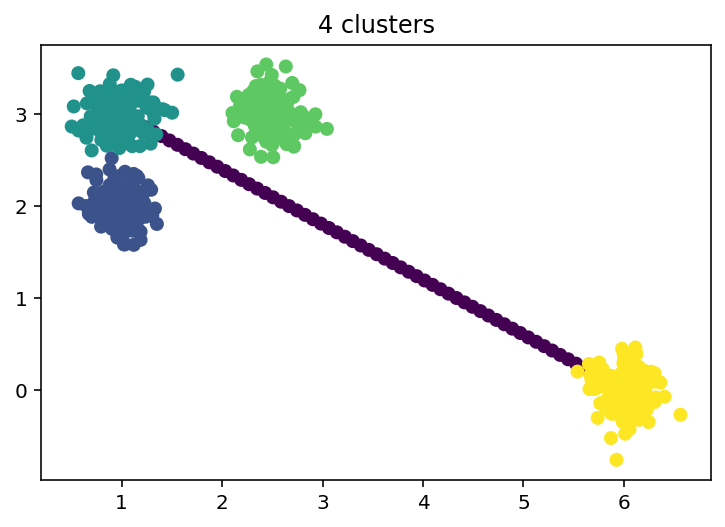

In [96]:
X, labels_truth = make_blobs_with_line()
scatter_blobs(X,labels_truth,"4 clusters")

First, run DBSCAN with the default parameters. 

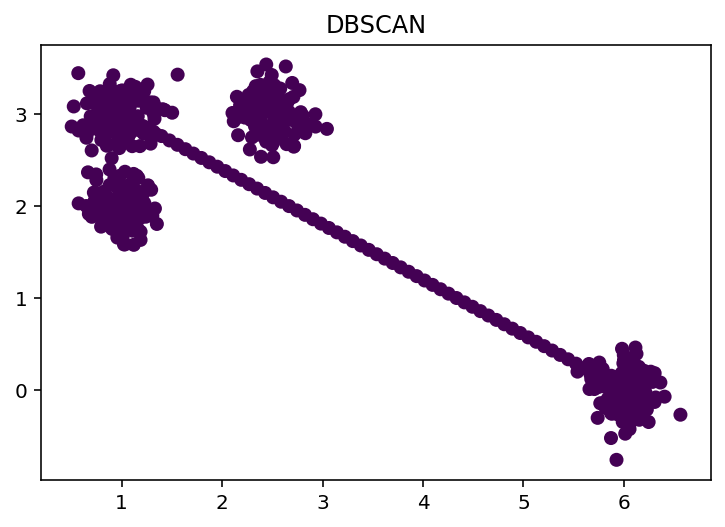

Estimated number of clusters: 1
Estimated number of noise points: 0


In [97]:
db = DBSCAN().fit(X)
scatter_blobs(X,db.labels_,"DBSCAN")
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
n_noise_ = list(db.labels_).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Even though there are four clusters according to `make_blobs`, the default values in DBSCAN lead to a single cluster.

# Q3 DBSCAN hyperparameter search

There are two important hyperparameters `eps`, and `min_sample` you can choose to determine how many clusters you may end up with. Implement the function `grid_search()` to perform a grid search of different values of `eps` and `min_sample` to obtain the best clustering. 

In `grid_search()`, you should print out the number of clusters and the number of noise points after each DBSCAN computation. 

Use the function `plot_min_samples()` to graph the result of the clustering. 

A good pair `(eps, min_samples)` should give us the correct number of the clusters and very few noise points. 

In [98]:
class DBSCAN_hyperparameters:

    def __init__(self): 
        self.data_plotly = {"eps": [], "min_samples": [], "point_id": [], "x": [], "y": [], "label": [] }

    def write(self, X, eps, min_samples, labels): 
        """
        Saving the labels and other data to self.data_plotly.
        """
        for point_id, (X_, label) in enumerate(zip(X, labels)):
            self.data_plotly["eps"].append(eps)
            self.data_plotly["min_samples"].append(min_samples)
            self.data_plotly["point_id"].append(point_id)
            self.data_plotly["x"].append(X_[0])
            self.data_plotly["y"].append(X_[1])
            self.data_plotly["label"].append(label)
            
    def finalize(self):
        self.df = pd.DataFrame(self.data_plotly) # convert to panda dataframe
        return self
            
    def plot_min_samples(self, min_samples):
        """
        min_samples: integer scalar; this should be one of the values 
                     previously passed to search() in the list eps_ranges.
        """
        
        assert hasattr(self, 'df') and not self.df.empty, 'You need to run grid_search() before calling this function.'
        
        return px.scatter(self.df[self.df["min_samples"] == min_samples], 
                          title = f"min_samples = {min_samples}", 
                          x="x", y="y", animation_frame="eps", animation_group="point_id",
                          color="label", width=610, height= 600) 

In [99]:
def grid_search(X, eps_ranges=[0.1, 0.5], min_samples_ranges=[2, 10]):
    """
    Grid search to identify the best eps and min_samples.
    eps_ranges and min_samples_ranges should be lists of values to be used in the grid search.
    """
    
    db_hp = DBSCAN_hyperparameters() # required for plotting later on

    for min_samples in min_samples_ranges:  
        for eps in eps_ranges:        

            # Start your implementation here
            db = DBSCAN(eps = eps, min_samples = min_samples ).fit(X)
            scatter_blobs(X,db.labels_,"DBSCAN")

            n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
            n_noise_ = list(db.labels_).count(-1)
            print("min samples: {}  eps: {}".format(min_samples, eps))
            print("Estimated number of clusters: %d" % n_clusters_)
            print("Estimated number of noise points: %d" % n_noise_)
               
            # End your implementation here!
            
            # labels should be set equal to the DBSCAN labels you just computed.

            #db_hp.write(X, eps, min_samples, labels) # save data for future plotting
            db_hp.write(X, eps, min_samples, db.labels_)

    return db_hp.finalize() # return DBSCAN_hyperparameters for plotting with plot_min_samples()

# Q4 DBSCAN hyperparameter exploration and plotting

Test your implementation by running the following cell after you have filled in the proper values in a list for `chosen_eps_ranges` and `chosen_min_samples_ranges`. 

What pairs of the value `(eps, min_sample)` give you the best results? 

In [100]:
X, labels_truth = make_blobs_with_line()

In [ ]:
chosen_eps_ranges = [0.1,0.2,0.3,0.4] # Please fill in the empty list 
chosen_min_samples_ranges = [4,6,7,8,10]  # Please fill in the empty list 

DBSCAN_params = grid_search(X, chosen_eps_ranges, chosen_min_samples_ranges) 

According to the test result, (eps = 0.2 , min_sample = 10), (eps = 0.2 , min_sample = 8), and  (eps = 0.2 , min_sample = 7) give the best results, which have correct cluster number and minimum noise points (~50 noise points)

In [102]:
DBSCAN_params.plot_min_samples(chosen_min_samples_ranges[0])

In [103]:
DBSCAN_params.plot_min_samples(chosen_min_samples_ranges[1])

In [104]:
DBSCAN_params.plot_min_samples(chosen_min_samples_ranges[2])

In [105]:
DBSCAN_params.plot_min_samples(chosen_min_samples_ranges[3])

In [106]:
DBSCAN_params.plot_min_samples(chosen_min_samples_ranges[4])

# Q5 Core, Border, Noise points in DBSCAN 

In the DBSCAN algorithm, the points can be classified as `core`, `border`, or `noise`.

A point p is regarded as a `core` point if at least `min_samples` are within distance `eps` of it (including p). 

A point q is a `border` point if it is within a `eps` neighborhood of a `core` point but itself is not a `core` point. 

A point o is a `noise` point if it is neither a `core` point nor a `border` point. 

See also the lecture slides for the definition of these terms.

Implement the function `DBSCAN_point_types(X, eps, min_samples)` using the function `DBSCAN` in sklearn to return the labels of the input `X`, the indices of the core points, the indices of the border points, and the indices of the noise points. All return variables should be of type `list`.

In [107]:
def DBSCAN_point_types(X, eps, min_samples): 
    # Start your implementation here.

    db = DBSCAN(eps = eps, min_samples = min_samples).fit(X)
    
    #cast labels to a list
    labels = list(db.labels_)
    #print(labels)

    #list of core sample indices
    core_sample_indices = db.core_sample_indices_
    #print(core_sample_indices)

    #list of noise indices
    noise_indices = [i for i in range(len(labels)) if labels[i] == -1]
    #print(noise_indices)

    #combine noise and core sample indices
    non_border = sorted(list(core_sample_indices) + list(noise_indices))
    #print(non_border)

    #list of border indices

    all_indices = list(range(0, len(labels)))

    border_indices = [x for x in all_indices if x not in non_border]

    # borders_indices = np.array([])
    # border_indices = np.delete(labels, non_border)
    #print(border_indices)




    return labels, core_sample_indices, border_indices, noise_indices
  

In [108]:
def draw_DBSCAN_point_types(X, labels, core_sample_indices, border_indices, noise_indices):
  
    unique_labels = set(labels)
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[core_sample_indices] = True 

    border_samples_mask = np.zeros_like(labels, dtype=bool)
    border_samples_mask[border_indices] = True 
    
    noise_samples_mask = np.zeros_like(labels, dtype=bool)
    noise_samples_mask[noise_indices] = True     

    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise point.
            col = [0, 0, 0, 1]

        class_member_mask = labels == k

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=14
        )

        xy = X[class_member_mask & border_samples_mask] if k != -1 else X[class_member_mask & noise_samples_mask]
        plt.plot(
          xy[:, 0],
          xy[:, 1],
          "o",
          markerfacecolor=tuple(col),
          markeredgecolor="k",
          markersize=6
        )
    plt.title(f"Number of DBSCAN clusters: {len(unique_labels)-1}")
    plt.show()
    
    print(f"Number of DBSCAN clusters: {len(unique_labels)-1:4}")
    print(f"Number of core points:     {len(core_sample_indices):4}")    
    print(f"Number of border points:   {len(border_indices):4}")    
    print(f"Number of noise points:    {len(noise_indices):4}")
    print(f"Number of points:          {X.shape[0]:4}")    

You are given the above function `draw_DBSCAN_point_types`. Run the following cell to test your implementation. 



In [109]:
X, labels_truth = make_blobs_with_line()

In [110]:
labels, core_sample_indices, border_indices, noise_indices = DBSCAN_point_types(X, 0.15, 10)

assert X.shape[0] == len(noise_indices) + len(border_indices) + len(core_sample_indices), "Inconsistency between the size of the set and the number of core+border+noise points"

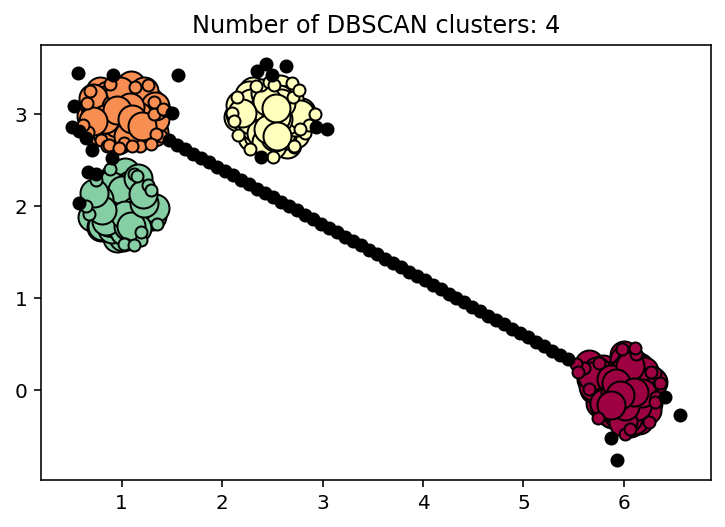

Number of DBSCAN clusters:    4
Number of core points:      418
Number of border points:     71
Number of noise points:      75
Number of points:           564


In [111]:
draw_DBSCAN_point_types(X, labels, core_sample_indices, border_indices, noise_indices)

# Q6 Anisotropically distributed blobs

You were given the following code to generate anisotropically distributed blobs. Run both the k-means algorithm you implemented in Q1 and DBSCAN from sklearn with the best hyperparameters you can find. You should use `DBSCAN_hyperparameter_search` for hyperparameter search for DBSCAN. 

Plot the clusters generated by DBSCAN and k-means. Comment and describe your observations. Which algorithm may be more suitable for this example and why?

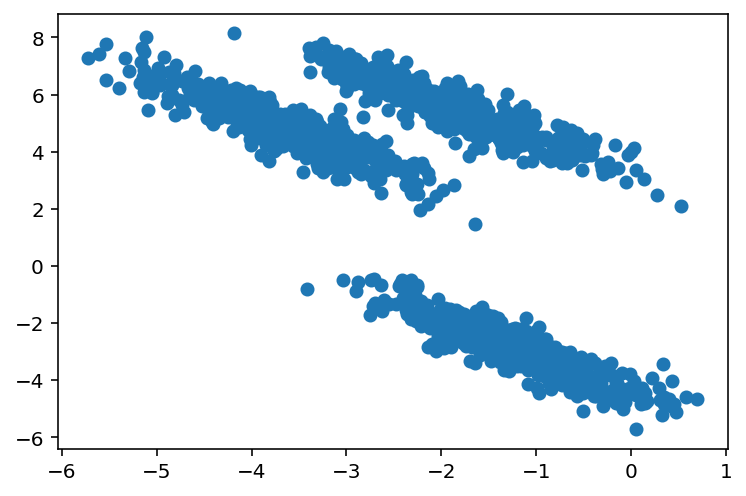

In [112]:
n_samples = 1500
random_state = 172
transformation = [[0.60834549, -0.5], [-0.40887718, 0.85253229]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
X_aniso = np.dot(X, transformation)  # Anisotropic blobs
plt.scatter(X_aniso[:,0], X_aniso[:,1])

In [ ]:
chosen_eps_ranges = [0.2,0.3,0.4] # student should fill in those value 
chosen_min_samples_ranges = [7,8,10]  # student should fill in those value 

DBSCAN_params = grid_search(X_aniso, chosen_eps_ranges, chosen_min_samples_ranges) 

my_kmean_inertia:2175.780


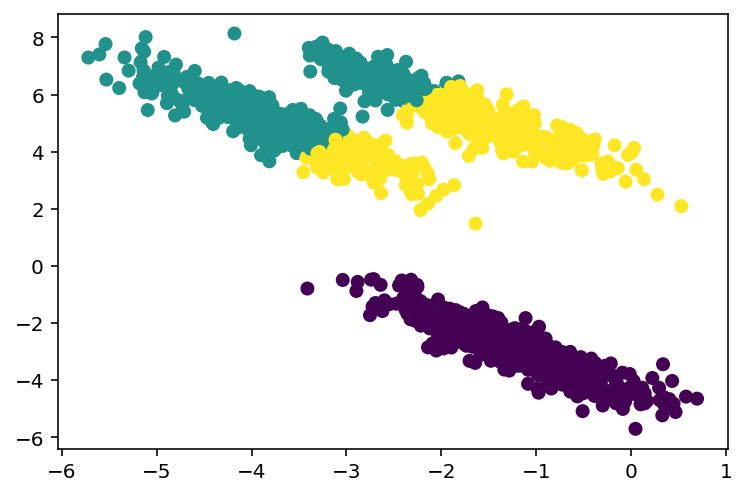

In [114]:
my_kmean = my_KMeans(n_clusters=3) 
centroids, centroid_idx, _ = my_kmean.fit_transform(X_aniso) 
plt.scatter(X_aniso[:,0], X_aniso[:,1], c = centroid_idx)

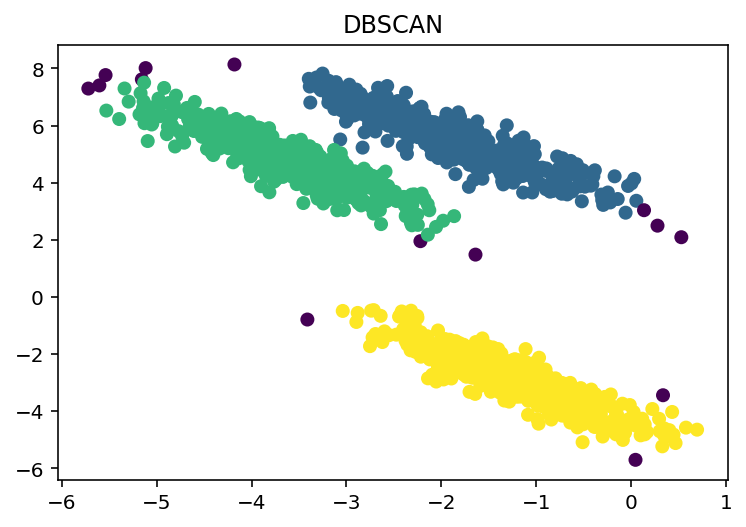

In [115]:
db = DBSCAN(eps= 0.4 , min_samples= 8).fit(X_aniso) # use the best pair (eps, min_sample) you found above
scatter_blobs(X_aniso,db.labels_,"DBSCAN")

DBSCAN is more suitable for culstering anisotropically distributed blobs than K means. In general k means can only work with clusters that have simple shape such as isotropic sphere. 

# Q7 Blobs with different variances 

Repeat the previous study on this dataset.

In [116]:
n_samples = 1500
random_state = 172 

# Unequal variance
X_varied, y_varied = make_blobs(n_samples=n_samples, cluster_std=[1.0, 3, 0.5], random_state=random_state)

In [ ]:
chosen_eps_ranges = [0.1,0.2,0.3,0.4,0.5,0.6] # student should fill in those value 
chosen_min_samples_ranges = [3,4,5,6,7,8,9]  # student should fill in those value 

DBSCAN_params = grid_search(X_varied, chosen_eps_ranges, chosen_min_samples_ranges) 

my_kmean_inertia:8515.602


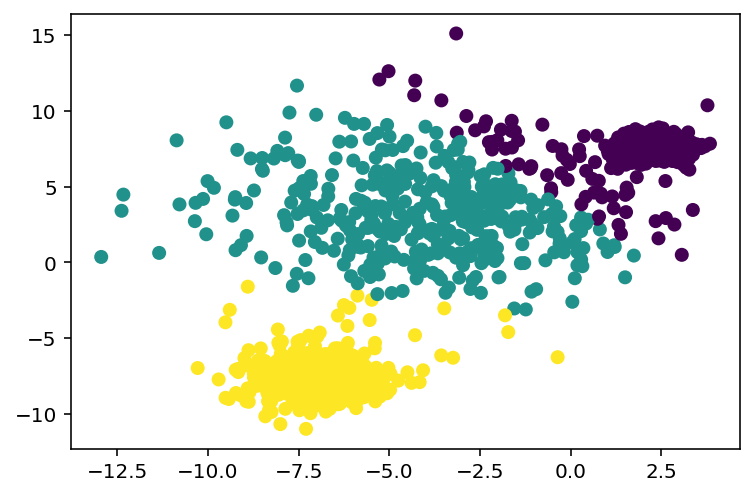

In [118]:
my_kmean = my_KMeans(n_clusters=3) 
centroids, centroid_idx, _ = my_kmean.fit_transform(X_varied) 
plt.scatter(X_varied[:,0], X_varied[:,1], c = centroid_idx)

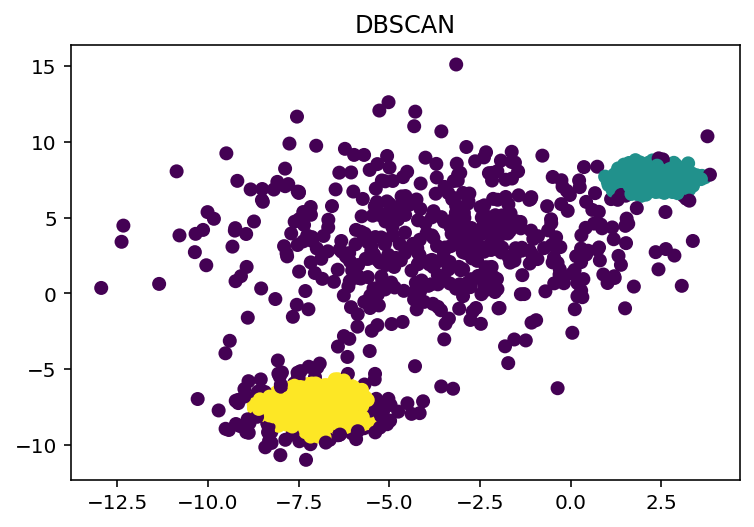

In [119]:
db = DBSCAN(eps= 0.3 ,min_samples= 8 ).fit(X_varied) # use the best pair (eps, min_sample) you found above
scatter_blobs(X_varied,db.labels_,"DBSCAN")

Given the non-uniform distribution of data points in this case, K means produces better result than DBSCAN. DBSCAN does not work well if the density of points is very non-uniform.

# Q8 Blobs with outliers 

Repeat the previous study on this dataset.

In [120]:
def generate_gaussian_blobs_outliers(n_samples):
    X, y = make_blobs(n_samples=n_samples, centers=3, n_features=2, random_state=172)
    X_outlier = random.choices(np.arange(-50, 50, 0.01), k=60)
    X_outlier = np.reshape(X_outlier, (30,2))
    y_outlier = np.asarray([4] * 30)
    X = np.concatenate((X, X_outlier), axis=0)
    y = np.concatenate((y, y_outlier))  
    return X, y, "Gaussian blobs"

In [121]:
X_outlier, _, _ = generate_gaussian_blobs_outliers(500)

In [ ]:
chosen_eps_ranges = [0.1,0.2,0.3,0.4,0.5] # student should fill in those value 
chosen_min_samples_ranges = [2,4,6,8,10]  # student should fill in those value 

DBSCAN_params = grid_search(X_outlier, eps_ranges = chosen_eps_ranges, min_samples_ranges = chosen_min_samples_ranges) 

my_kmean_inertia:37383.032


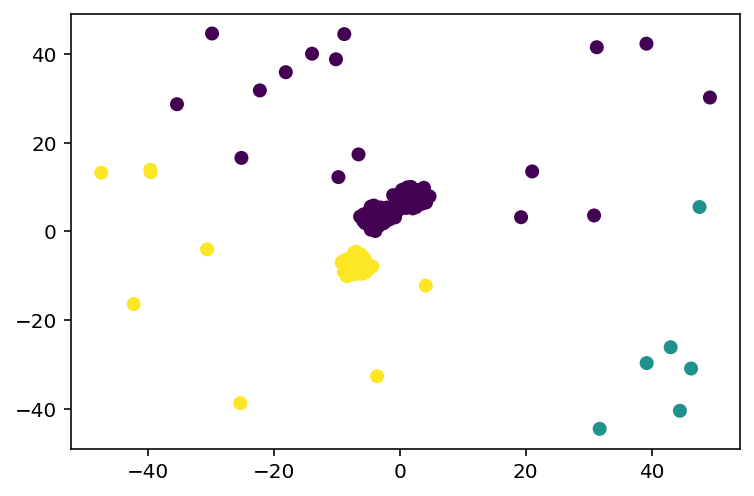

In [123]:
my_kmean = my_KMeans(n_clusters=3) 
centroids, centroid_idx, _ = my_kmean.fit_transform(X_outlier) 
plt.scatter(X_outlier[:,0], X_outlier[:,1], c = centroid_idx)

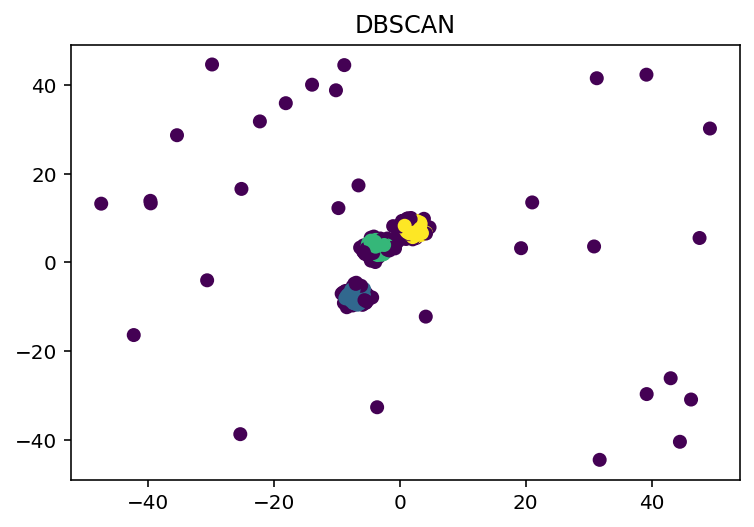

In [124]:
db = DBSCAN(eps= 0.5,min_samples=8 ).fit(X_outlier) # use the best pair (eps, min_sample) you found above
scatter_blobs(X_outlier,db.labels_,"DBSCAN")

DBSCAN produces better result than K means in this case. From the plot we can see that DBSCAN is able to differentiate between clusters and identify outliers as noise points. 

# Q9 Concentric circles with noise 

Repeat the previous study on this dataset. 

In [125]:
n_samples = 500
noisy_circles = make_circles(n_samples=n_samples, factor=0.4, noise=0.065)
noisy_moons = make_moons(n_samples=n_samples, noise=0.05)

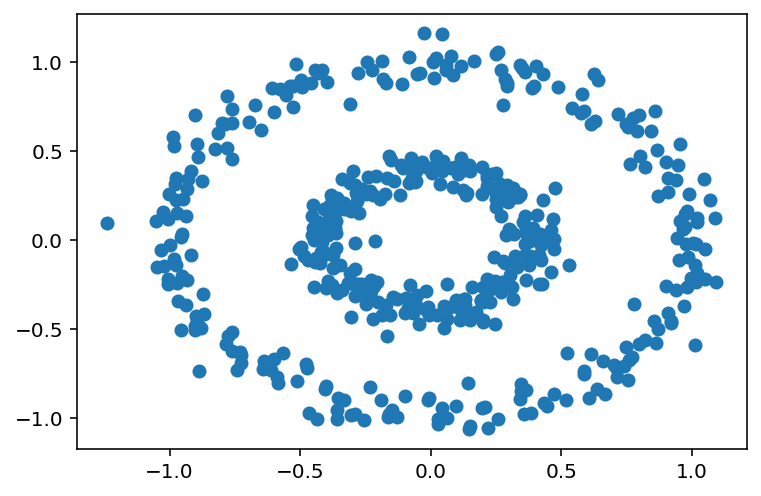

In [126]:
X_circles, y_circles = noisy_circles 
plt.scatter(X_circles[:, 0], X_circles[:, 1])

In [ ]:
chosen_eps_ranges = [0.1,0.2,0.3,0.4,0.5] # student should fill in those value 
chosen_min_samples_ranges = [2,4,6,8,10]  # student should fill in those value

DBSCAN_params = grid_search(X_circles, eps_ranges = chosen_eps_ranges, min_samples_ranges = chosen_min_samples_ranges ) 

my_kmean_inertia:191.717


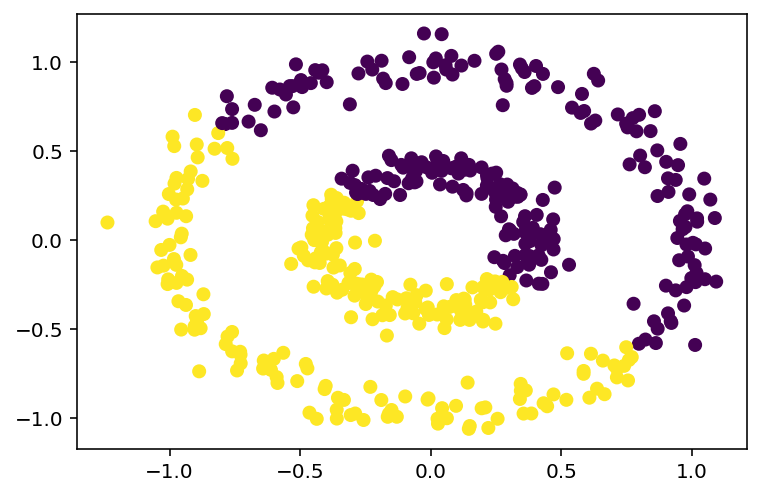

In [128]:
my_kmean = my_KMeans(n_clusters=2) 
centroids, centroid_idx, _ = my_kmean.fit_transform(X_circles) 
plt.scatter(X_circles[:,0], X_circles[:,1], c = centroid_idx)

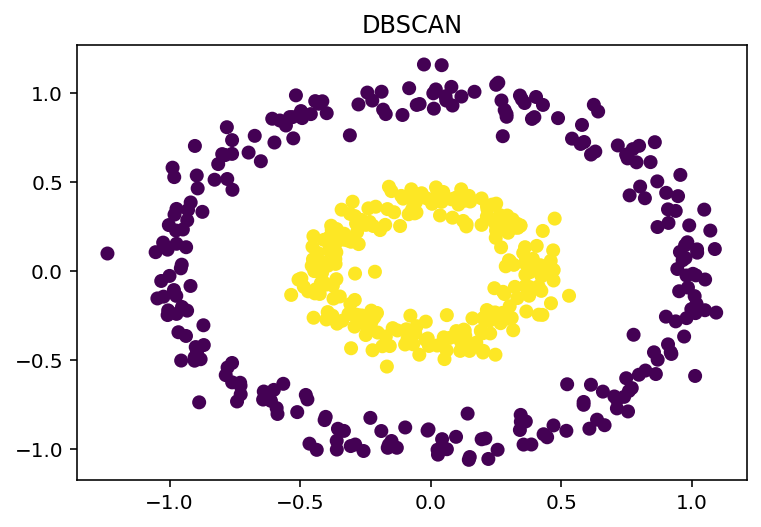

In [129]:
db = DBSCAN(eps= 0.2 ,min_samples= 8 ).fit(X_circles) # use the best pair (eps, min_sample) you found above
scatter_blobs(X_circles,db.labels_,"DBSCAN")

Given the anisotrpoic shape and non-uniform density of concentric data points with noise, DBSCAN produces better result. As shown in plots, DBSCAN is able to seperate inner circle points from outlier points. 